<a href="https://colab.research.google.com/github/harikrishna0007/Hari_Data690/blob/main/Assignment_04/Assignment_04b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use Pandas to read the file census_costs.txt file

In [21]:
import pandas as pd


In [30]:
data_url = "https://raw.githubusercontent.com/DATA-690-SPRING-2022/WANG/main/assignment_04/census_costs.txt"

In [31]:
df = pd.read_csv(data_url, skiprows = 1, sep = "\t")

df.head()

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents


# 2.Find out how many rows and columns it has

In [32]:
df.shape

(23, 4)

# 3.Display first 10, last 10, and random 10 rows

In [33]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [34]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [35]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
1,1800,"5,308,483","$66,109",1.24 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
22,2010*,"308,745,538",$13 Billion,$42.11
5,1840,"17,069,458","$833,371",4.88 cents
12,1910,"91,972,266","$15,968,000",17.07 cents
4,1830,"12,866,020","$378,545",2.94 cents
19,1980,"226,542,199","$1,078,488,000",$4.76
7,1860,"31,443,321","$1,969,377",6.26 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
18,1970,"203,302,031","$247,653,000",$1.22


# 4.Find out the data types of all columns - use info() function

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


# 5.Find out the summary statistics of all columns

In [37]:
df.describe(include='all')

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


# 6.Cleanse the data to make the year, population, cost, cost per person numerical type - use apply() function

In [38]:
def cleanse_pop(a_string):
  return int(a_string.replace(",","").replace("*",""))
df["year_list"] = df["Census Year"].apply(cleanse_pop)  
df["tot_pop"] = df["Total Population"].apply(cleanse_pop)
df

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_list,tot_pop
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214
1,1800,"5,308,483","$66,109",1.24 cents,1800,5308483
2,1810,"7,239,881","$178,445",2.46 cents,1810,7239881
3,1820,"9,633,822","$208,526",2.16 cents,1820,9633822
4,1830,"12,866,020","$378,545",2.94 cents,1830,12866020
5,1840,"17,069,458","$833,371",4.88 cents,1840,17069458
6,1850,"23,191,876","$1,423,351",6.14 cents,1850,23191876
7,1860,"31,443,321","$1,969,377",6.26 cents,1860,31443321
8,1870,"38,558,371","$3,421,198",8.87 cents,1870,38558371
9,1880,"50,155,783","$5,790,678",11.54 cents,1880,50155783


In [39]:
def cleanse_pop(a_string):
  return (a_string.replace(",","").replace("$","").replace(" Billion","000000000").replace("cents",""))
df["cost_list"] = df["Census Cost"].apply(cleanse_pop)
df["avg_list"] = df["Average Cost Per Person"].apply(cleanse_pop)
df

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_list,tot_pop,cost_list,avg_list
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214,44377,1.13
1,1800,"5,308,483","$66,109",1.24 cents,1800,5308483,66109,1.24
2,1810,"7,239,881","$178,445",2.46 cents,1810,7239881,178445,2.46
3,1820,"9,633,822","$208,526",2.16 cents,1820,9633822,208526,2.16
4,1830,"12,866,020","$378,545",2.94 cents,1830,12866020,378545,2.94
5,1840,"17,069,458","$833,371",4.88 cents,1840,17069458,833371,4.88
6,1850,"23,191,876","$1,423,351",6.14 cents,1850,23191876,1423351,6.14
7,1860,"31,443,321","$1,969,377",6.26 cents,1860,31443321,1969377,6.26
8,1870,"38,558,371","$3,421,198",8.87 cents,1870,38558371,3421198,8.87
9,1880,"50,155,783","$5,790,678",11.54 cents,1880,50155783,5790678,11.54


In [40]:
df['cost_list'] = pd.to_numeric(df['cost_list'])
df['avg_list'] = pd.to_numeric(df['avg_list'])

# 7.Find out the summary statistics of the numerical columns - use describe() function

In [41]:
df.describe()

,year_list,tot_pop,cost_list,avg_list
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,7.489065e+08,17.921739
std,67.8233,9.622629e+07,2.726728e+09,20.200432
min,1790.0000,3.929214e+06,4.500000e+00,1.130000
25%,1845.0000,2.013067e+07,6.059580e+05,3.850000
50%,1900.0000,7.630339e+07,1.154713e+07,10.020000
75%,1955.0000,1.653245e+08,7.949450e+07,21.045000
max,2010.0000,3.087455e+08,1.300000e+10,71.340000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Census Year              23 non-null     object 
 1   Total Population         23 non-null     object 
 2   Census Cost              23 non-null     object 
 3   Average Cost Per Person  23 non-null     object 
 4   year_list                23 non-null     int64  
 5   tot_pop                  23 non-null     int64  
 6   cost_list                23 non-null     float64
 7   avg_list                 23 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ KB


# 8.Use Pandas built-in plotting function to plot the average cost per person over time.

In [44]:
import matplotlib.pyplot as plt


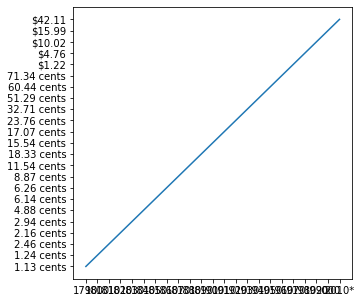

In [45]:
plt.figure(figsize=(5, 5))
plt.plot(df['Census Year'],df['Average Cost Per Person'])

# 9.Use Pandas built-in plotting function to plot the scatter plot of Total Population vs Total Cost.

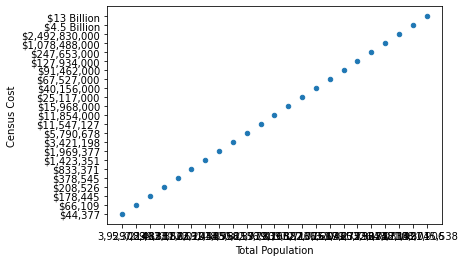

In [46]:
df.plot.scatter("Total Population", "Census Cost")